Model training!

In [1]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
from fastai.tabular.all import (
    TabularDataLoaders, RandomSplitter,
    FillMissing, Categorify, Normalize, CategoryBlock, range_of, RegressionBlock
)

df['Survived'] = df['Survived'].astype(float)
procs = [Categorify, FillMissing, Normalize]
path = '.'     
cat_names  = ['SibSp','Parch','Sex','Pclass','Embarked']
cont_names = ['Fare','Age']

dls = TabularDataLoaders.from_df(
    df, 
    path='.', 
    procs=procs,
    cat_names=cat_names, 
    cont_names=cont_names,
    y_names='Survived',
    y_block=RegressionBlock(),
    splits=RandomSplitter(0.2)(range_of(df))
)

c:\Code\Local Code\titanic_survive\.venv\Lib\site-packages\fastai\tabular\core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)


In [3]:
from fastai.tabular.all import MSELossFlat, rmse, mae, R2Score, tabular_learner

learn = tabular_learner(
    dls,
    loss_func=MSELossFlat(),
    metrics=[rmse, mae, R2Score()] 
)

SuggestedLRs(valley=0.0012022644514217973)

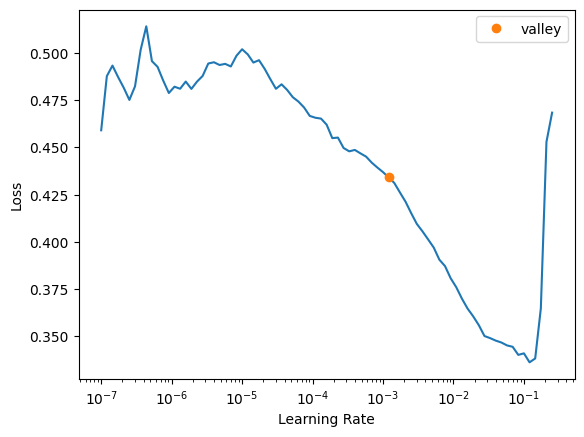

In [22]:
learn.lr_find()

epoch,train_loss,valid_loss,_rmse,mae,r2_score,time
0,0.541876,0.225846,0.475233,0.441723,0.058086,00:00
1,0.358752,0.217108,0.465948,0.390991,0.094531,00:00
2,0.283644,0.178044,0.421952,0.360981,0.257452,00:00
3,0.236922,0.168740,0.410779,0.369333,0.296255,00:00
4,0.211009,0.160303,0.400379,0.303756,0.331442,00:00
5,0.191205,0.138747,0.372488,0.290275,0.421342,00:00
6,0.173918,0.134945,0.367348,0.262874,0.437200,00:00
7,0.161379,0.128541,0.358527,0.257091,0.463906,00:00


<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

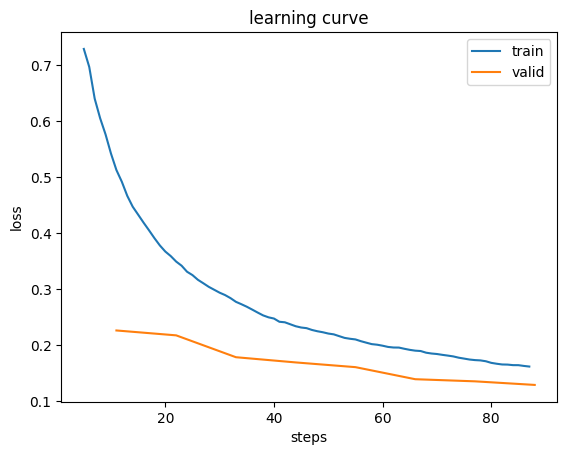

In [5]:
from fastai.tabular.all import tabular_learner, accuracy

learn.fit_one_cycle(8,slice(1e-3, 5e-2))
learn.recorder.plot_loss()


Validation accuracy:  33.37%
Validation error rate: 66.63%
steps_per_epoch=11 batches/epoch
total_steps=55 total training steps


SuggestedLRs(valley=0.0002754228771664202)

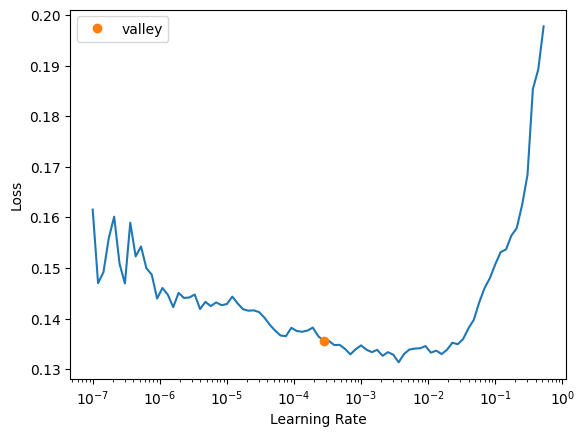

In [9]:
res = learn.validate()
valid_loss, accuracy = res[0], res[1]
print(f"Validation accuracy:  {accuracy*100:.2f}%")
print(f"Validation error rate: {(1-accuracy)*100:.2f}%")

# steps per epoch
steps_per_epoch = len(dls.train)
print(f"{steps_per_epoch=} batches/epoch")

# if you’re going to train n_epochs
n_epochs = 5
total_steps = steps_per_epoch * n_epochs
print(f"{total_steps=} total training steps")

# run the finder
learn.lr_find()



epoch,train_loss,valid_loss,_rmse,mae,r2_score,time
0,0.530828,0.359546,0.599621,0.430653,-0.480229,00:00
1,0.416520,0.209821,0.458062,0.442651,0.136178,00:00
2,0.314566,0.202044,0.449493,0.431366,0.168197,00:00
3,0.257977,0.177844,0.421716,0.394308,0.267825,00:00
4,0.229508,0.163440,0.404277,0.340183,0.327127,00:00
5,0.204577,0.167351,0.409085,0.296046,0.311027,00:00
6,0.182588,0.157857,0.397312,0.281317,0.350113,00:00
7,0.172345,0.200586,0.447869,0.336649,0.174198,00:00
8,0.160549,0.160231,0.400289,0.298731,0.340337,00:00
9,0.148950,0.157801,0.397242,0.290671,0.350341,00:00


<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

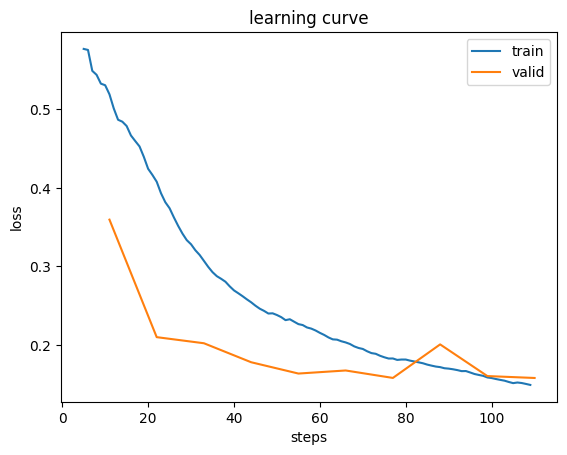

In [4]:
from fastai.tabular.all import tabular_learner, accuracy

learn.fit_one_cycle(10,slice(1e-4, 1e-2))
learn.recorder.plot_loss()

epoch,train_loss,valid_loss,_rmse,mae,r2_score,time
0,0.564609,0.410778,0.640920,0.448037,-0.964544,00:00
1,0.453472,0.289252,0.537822,0.323629,-0.383346,00:00
2,0.351824,0.183253,0.428080,0.397742,0.123595,00:00
3,0.285298,0.164435,0.405506,0.366738,0.213590,00:00
4,0.242387,0.147543,0.384113,0.305797,0.294378,00:00
5,0.213784,0.142685,0.377737,0.288253,0.317610,00:00
6,0.199541,0.158179,0.397718,0.289910,0.243508,00:00
7,0.182927,0.146961,0.383355,0.254414,0.297161,00:00
8,0.168698,0.134083,0.366173,0.273033,0.358750,00:00
9,0.158672,0.130157,0.360772,0.276056,0.377527,00:00


<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

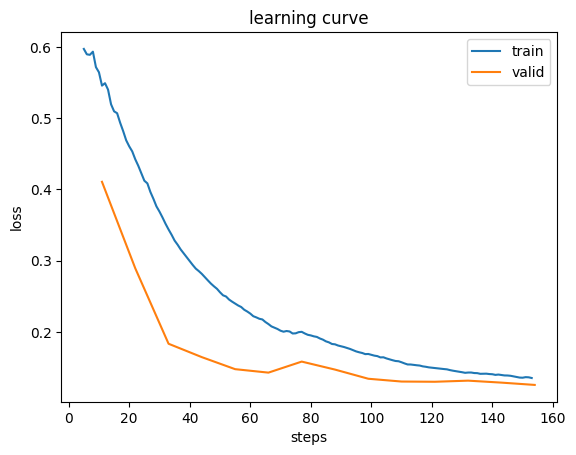

In [4]:
from fastai.tabular.all import tabular_learner, accuracy

learn.fit_one_cycle(14,slice(1e-4, 1e-2))
learn.recorder.plot_loss()

In [ ]:
learn.export('titanic_model_v3.3.pkl')